In [34]:
import os
from glob import glob
from tqdm.notebook import tqdm
import cv2
import pandas as pd

In [35]:
os.chdir('/content/drive/MyDrive')

In [ ]:
!sudo apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
!tree yolov5 -L 1

yolov5
├── data
├── detect.py
├── Dockerfile
├── hubconf.py
├── LICENSE
├── models
├── __pycache__
├── README.md
├── requirements.txt
├── runs
├── test.py
├── train.py
├── tutorial.ipynb
├── utils
├── wandb
├── weights
└── yolov5s.pt

7 directories, 10 files


In [36]:
labels = glob('Train_Dev/train_labels/*') 

['Train_Dev/train_labels/IMG_170406_035932_0022_RGB4.csv',
 'Train_Dev/train_labels/IMG_170406_040033_0073_RGB2.csv',
 'Train_Dev/train_labels/IMG_170406_040308_0202_RGB1.csv',
 'Train_Dev/train_labels/IMG_170406_040353_0239_RGB2.csv',
 'Train_Dev/train_labels/IMG_170406_035939_0028_RGB3.csv',
 'Train_Dev/train_labels/DSC081093.csv',
 'Train_Dev/train_labels/IMG_170406_035933_0023_RGB3.csv',
 'Train_Dev/train_labels/IMG_170406_040009_0053_RGB1.csv',
 'Train_Dev/train_labels/IMG_170406_040408_0252_RGB2.csv',
 'Train_Dev/train_labels/IMG_170406_040156_0142_RGB1.csv',
 'Train_Dev/train_labels/DSC080814.csv',
 'Train_Dev/train_labels/IMG_170406_040105_0099_RGB4.csv',
 'Train_Dev/train_labels/IMG_170406_040355_0241_RGB4.csv',
 'Train_Dev/train_labels/IMG_170406_040356_0242_RGB2.csv',
 'Train_Dev/train_labels/IMG_170406_040108_0102_RGB3.csv',
 'Train_Dev/train_labels/IMG_170406_040108_0102_RGB4.csv',
 'Train_Dev/train_labels/IMG_170406_040202_0147_RGB3.csv',
 'Train_Dev/train_labels/IMG_1704

In [4]:
imgs = glob('/content/drive/MyDrive/Train_Dev/training/*')

In [12]:
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as patches

In [17]:
df = pd.read_csv(labels[0],header=None)

In [21]:
df

,0,1
0,897,36
1,906,76
2,915,126
3,927,179
4,929,221
...,...,...
1135,2015,590
1136,1815,21
1137,288,1725
1138,349,1717


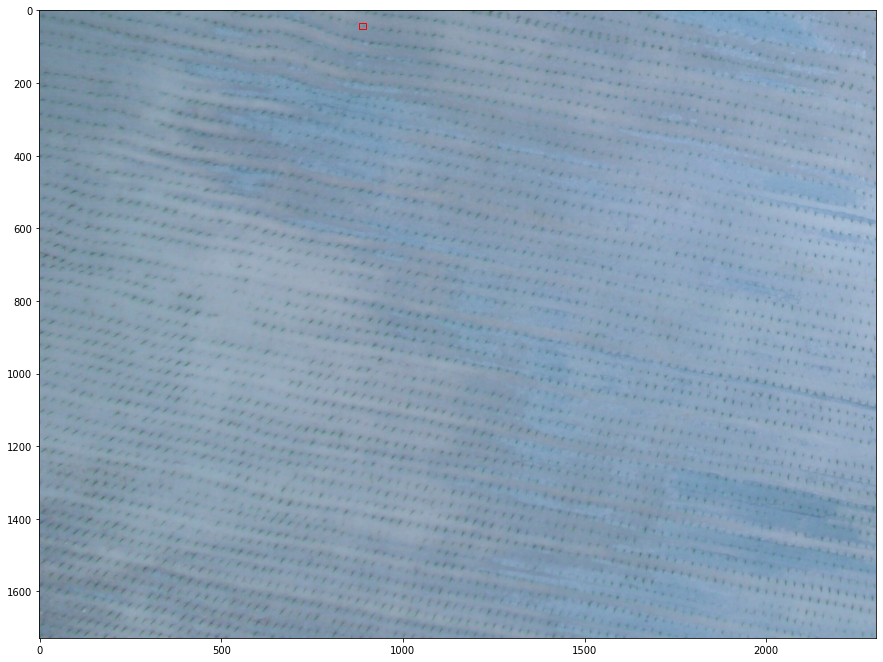

In [31]:
img = cv2.imread(imgs[0])
plt.figure(figsize=(15,15))
plt.imshow(img)
currentAxis=plt.gca()
rect=patches.Rectangle((879, 36),20,17,linewidth=1,edgecolor='r',facecolor='none')
currentAxis.add_patch(rect)

In [37]:
if not os.path.isdir('label'):
  os.mkdir('label')

In [ ]:
Train_Dev/training/{}.JPG

In [52]:
# fast 2c
with open('label/'+'train'+'.txt','w') as f:
  rname = 'image_id width height bbox source\n'
  f.writelines(rname)
  for label in tqdm(labels,total=len(labels)):
    file_name = label.split('/')[2].split('.')[0]
    df = pd.read_csv(label,header=None)
    im = cv2.imread('Train_Dev/training/{}.JPG'.format(file_name))
    w,h = im.shape[1],im.shape[0]
    xs,ys = df[0],df[1]
    n = '1'
    if file_name.find('IMG') == -1:n = '0'     
    for x,y in zip(xs,ys):
      x,y = str(x),str(y)
      txt = '{} {} {} [{},{},{},{}] {}\n'.format(n,w,h,x,y,'20','20',file_name)
      f.writelines(txt)

In [ ]:
# yolo 2c
for label in tqdm(labels,total=len(labels)):
  file_name = label.split('/')[2].split('.')[0]
  df = pd.read_csv(label,header=None)
  im = cv2.imread('Train_Dev/training/{}.JPG'.format(file_name))
  lx,ly = im.shape[1],im.shape[0]
  xs,ys = df[0]/lx,df[1]/ly
  n = '1'
  if file_name.find('IMG') == -1:n = '0'     
  with open('label/'+file_name+'.txt','w') as f:
    for x,y in zip(xs,ys):
      x,y = str(x),str(y)
      txt = '{} {} {} {} {}\n'.format(n,x,y,'0.01','0.01')
      f.writelines(txt)

In [27]:
os.getcwd()

'/content/drive/MyDrive'

In [51]:
! rm -rf label/*txt

In [ ]:
imgs[0]

'/content/drive/MyDrive/Train_Dev/training/IMG_170406_035932_0022_RGB4.JPG'

In [ ]:
img = cv2.imread(imgs[0])

In [ ]:
img

array([[[107, 139, 158],
        [107, 139, 158],
        [110, 140, 157],
        ...,
        [153, 172, 193],
        [154, 173, 194],
        [154, 173, 194]],

       [[106, 138, 157],
        [107, 139, 158],
        [109, 139, 156],
        ...,
        [153, 172, 193],
        [153, 172, 193],
        [153, 172, 193]],

       [[108, 138, 155],
        [109, 139, 156],
        [111, 139, 156],
        ...,
        [153, 172, 193],
        [153, 172, 193],
        [153, 172, 193]],

       ...,

       [[ 94, 132, 134],
        [ 93, 131, 131],
        [ 92, 125, 128],
        ...,
        [137, 164, 190],
        [139, 164, 190],
        [140, 165, 191]],

       [[ 93, 131, 131],
        [ 95, 134, 132],
        [ 96, 130, 130],
        ...,
        [135, 165, 190],
        [137, 164, 190],
        [137, 164, 190]],

       [[ 91, 130, 128],
        [ 97, 136, 134],
        [102, 136, 135],
        ...,
        [134, 164, 189],
        [137, 164, 190],
        [137, 164, 190]]

In [ ]:
img.shape

(1728, 2304, 3)

In [ ]:
df[0].max()

2291

In [ ]:
df[1].max()

1725

In [25]:
n = '1'
file_name = 'Fiiii'
if file_name.find('F') == -1:
  n = '0'
print(file_name)
print(n)

Fiiii
1


In [21]:
file_name = labels[0].split('/')[2].split('.')[0]
print(file_name)
file_name.find('F')
if file_name.find('F') == -1:
  print('find f')
else:print('Okay~')

IMG_170406_035932_0022_RGB4
find f
